In [154]:
import numpy as np
import matplotlib.pyplot as plt

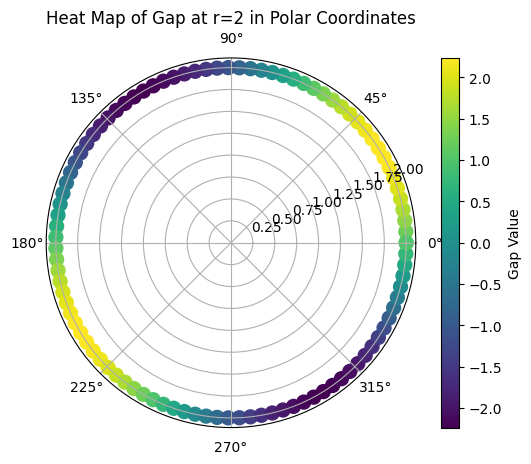

In [155]:
Delta1= 1
Delta2= 2
def Delta(x):
    return Delta1*np.cos(2*x) + Delta2*np.sin(2*x)
theta = np.linspace(0, 2*np.pi, 100)
Gap = Delta(theta)
r = np.full_like(theta, 2)
plt.figure()
ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r, c=Gap, cmap='viridis', s=100)
plt.colorbar(c, ax=ax, label='Gap Value')
ax.set_title('Heat Map of Gap at r=2 in Polar Coordinates')
plt.show()


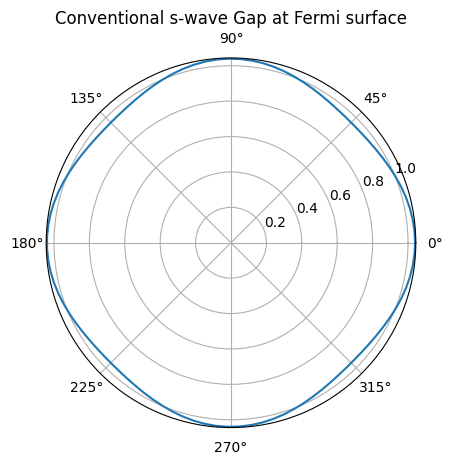

In [156]:
Delta3 = 0.04
Delta0 = 1
def Delta2(x):
    return Delta0 + Delta3*np.cos(4*x)
Gap2 = Delta2(theta)
plt.figure()
ax = plt.subplot(111, projection='polar')
ax.plot(theta, Gap2)
ax.set_title('Conventional s-wave Gap at Fermi surface')
plt.show()

In [157]:
t = 1.; tJ = 0.25*t
# Pauli matrices
sigma1 = np.array([[0, 1], [1, 0]], dtype=complex)
sigma2 = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma3 = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype=complex)

# tau (orbital/sublattice) Pauli matrices
tau1 = np.array([[0, 1], [1, 0]], dtype=complex)
tau2 = np.array([[0, -1j], [1j, 0]], dtype=complex)
tau3 = np.array([[1, 0], [0, -1]], dtype=complex)

def H(kx, ky):
    H0 = 2 * t * (np.cos(kx / 2) * np.kron(I2, tau1) + np.cos(ky) * np.kron(I2, I2))
    H1 = 2 * tJ * np.sin(kx / 2) * np.kron(sigma1, tau2)
    H2 = 2 * tJ * np.cos(ky) * np.kron(sigma2, tau3)
    return H0 + H1 + H2

In [158]:
nk = 200
kx,ky = np.meshgrid(np.linspace(-np.pi, np.pi, nk), np.linspace(-np.pi, np.pi, nk))
Hmatrix =  np.zeros((4, 4, nk,nk), dtype=complex)
E = np.zeros((4, nk,nk), dtype=complex)
V = np.zeros((4,4, nk,nk), dtype=complex)
expectSz = np.zeros((4,nk,nk), dtype=complex)
for i in range(nk):
    for j in range(nk):
        Hmatrix[:,:,i,j] = H(kx[i,j], ky[i,j])
        Ep, Vp = np.linalg.eig(Hmatrix[:,:,i,j])
        V[:,:,i,j] = Vp
        E[:,i,j] = Ep

In [163]:
for i in range(4):
 for j in range(nk):
  for k in range(nk):
   expectSz[i,j,k] = np.sum(np.abs(V[0:2,i,j,k])**2.) - np.sum(np.abs(V[2:4,i,j,k])**2.)

In [164]:
# Sort the energies E and corresponding expectSz along the band index (axis=0) for each (j, k)
E_sorted = np.sort(E, axis=0)
# Get the sorting indices to reorder expectSz accordingly
sort_indices = np.argsort(E, axis=0)
expectSz_sorted = np.zeros_like(expectSz)
for j_ in range(nk):
    for k_ in range(nk):
        expectSz_sorted[:, j_, k_] = expectSz[sort_indices[:, j_, k_], j_, k_]
# Now E_sorted and expectSz_sorted are both sorted along the band index

Text(0.5, 1.0, 'Energy Contour Plot')

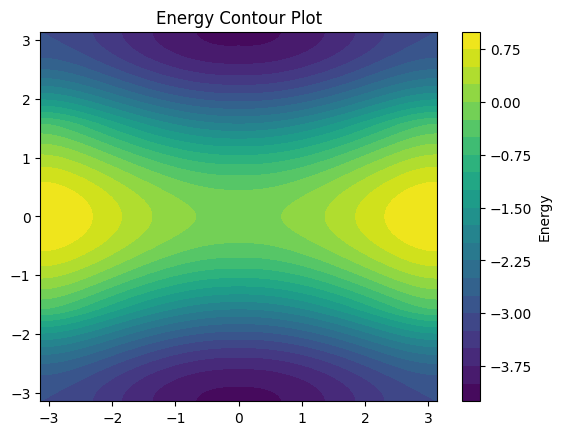

In [169]:
plt.figure()
plt.contourf(kx, ky, E_sorted[0,:,:].real, levels=20, cmap='viridis')
plt.colorbar(label='Energy')
plt.title('Energy Contour Plot')

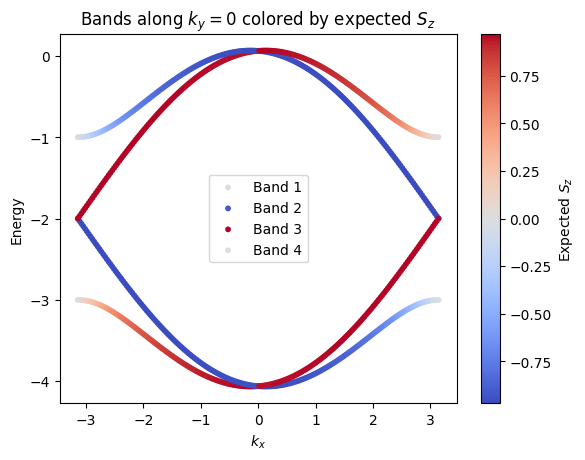

In [170]:
plt.figure()
for band in range(4):
    plt.scatter(
        kx[0, :],
        E_sorted[band, 0, :].real,
        c=expectSz_sorted[band, 0, :].real,
        cmap='coolwarm',
        label=f'Band {band+1}',
        s=10
    )
plt.xlabel('$k_x$')
plt.ylabel('Energy')
plt.title('Bands along $k_y=0$ colored by expected $S_z$')
plt.colorbar(label='Expected $S_z$')
plt.legend()
plt.show()